# **TUGAS PREPROCESSING**

NAMA : RISKA ARUM M. S.

NIM : 4101422126


## **1. Menampilkan Informasi Data dan Cek Misising Value**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [3]:
#pemanggilan data
data = pd.read_csv("/content/produk_elektronik.csv")
data

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea
...,...,...,...,...,...,...,...
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


In [5]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


## **2. a) Cek missing velues pada dataset. Berapa jumlah missing values disetiap kolom?**

In [6]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


In [7]:
#jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

Dari hasil pengecekan np.sum(data.isnull()), ditemukan adanya missing values pada beberapa kolom dalam dataset, yaitu:

harga: 30 missing values
rating: 50 missing values
jumlah_ulasan: 20 missing values

Dengan jumlah missing value keseluruhan adalah 100.

## **2. b)  Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.**

Keberadaan missing values dalam dataset dapat berdampak negatif terhadap analisis data dalam berbagai aspek, seperti:  

1. **Penurunan Kualitas Analisis**  
   Jika terlalu banyak data yang hilang dalam suatu kolom, informasi yang tersedia menjadi terbatas, sehingga analisis atau model yang digunakan mungkin kurang akurat.  

2. **Gangguan pada Perhitungan Statistik**  
   Banyak metode analisis data dan algoritma machine learning tidak dapat menangani missing values secara langsung. Misalnya, ketika menghitung rata-rata harga suatu produk, keberadaan data yang hilang dapat menyebabkan hasil yang bias atau kurang representatif.  

3. **Potensi Bias dalam Model Prediksi**  
   Jika data yang hilang tidak bersifat acak tetapi mengikuti pola tertentu (misalnya, hanya terjadi pada produk dari negara tertentu), model prediksi dapat menjadi bias dan menghasilkan kesimpulan yang keliru.  

4. **Menurunnya Kinerja Model Machine Learning**  
   Model pembelajaran mesin biasanya membutuhkan data yang lengkap untuk dapat mengenali pola dengan baik. Jika terdapat terlalu banyak missing values, model bisa gagal mempelajari hubungan antar variabel atau bahkan mengalami overfitting jika pengisian nilai yang hilang dilakukan dengan cara yang kurang tepat.  

5. **Kesulitan dalam Visualisasi dan Interpretasi Data**  
   Dalam pembuatan grafik atau visualisasi data, keberadaan missing values dapat menyebabkan hasil yang kurang akurat atau menyesatkan. Contohnya, jika banyak nilai harga yang hilang dalam histogram harga produk, distribusi yang dihasilkan mungkin tidak merepresentasikan kondisi sebenarnya.

## **HANDLING MISSING VALUE**

Dalam Machine Learning, keberadaan missing values merupakan permasalahan yang sering muncul dan perlu diselesaikan sebelum model dapat diterapkan. Cara mengatasi missing values bervariasi, tergantung pada jenis data serta karakteristik distribusinya.


### 1) Harga

In [8]:
#melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [9]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

Berdasarkan output di atas, terdapat beberapa kolom yang memiliki Missing Values dengan nilai 'nan'. Oleh karena itu, kita perlu membuat asumsi yang masuk akal berdasarkan jenis data yang tersedia.

**Asumsi untuk Kolom "Harga"**

Pendekatan yang paling masuk akal adalah menggunakan median harga untuk mengisi missing values.
Median adalah pilihan terbaik untuk mengisi missing values pada kolom harga karena tidak terpengaruh oleh outlier, sehingga tetap stabil meskipun ada nilai yang sangat tinggi atau rendah. Selain itu, median lebih mewakili nilai tengah, terutama jika distribusi harga tidak normal atau cenderung skewed. Metode ini juga mudah diterapkan karena dapat langsung dihitung dan digunakan tanpa memerlukan model prediksi yang kompleks.

In [10]:
#mengisi missing value
data['harga'].fillna(data['harga'].median(), inplace=True)


<ipython-input-10-0b03d55e43b5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['harga'].fillna(data['harga'].median(), inplace=True)


In [11]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

In [12]:
#melihat isi kolom
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,  5.160e+02,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  4.480e+02,  7.360e+02,  2.280e+02,  1.830e+02,
        5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,  5.910e+02,
        5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,  4.290e+02,
        2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,  3.850e+02,
        2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,  6.070e+02,
        6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,  3.300e+02,
        4.900e+02, -1.200e+01,  1.200e+02,  6.190e+02,  4.660e

### 2) Rating

In [13]:
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [14]:
np.sum(data['rating'].isnull())

50

Berdasarkan output di atas, terdapat beberapa kolom yang memiliki Missing Values dengan nilai 'nan'. Oleh karena itu, kita perlu membuat asumsi yang masuk akal berdasarkan jenis data yang tersedia.

**Asumsi untuk Kolom "Rating"**

Untuk kolom rating, asumsi yang masuk akal adalah mengisi nilai yang hilang dengan median rating. Hal ini karena median tidak terpengaruh oleh outlier dan lebih mewakili kecenderungan umum dari data rating yang tersedia. Selain itu, rating merupakan data ordinal, sehingga penggunaan median lebih sesuai dibandingkan rata-rata yang dapat terdistorsi oleh nilai ekstrem. Alternatif lain adalah mengisi nilai yang hilang berdasarkan kategori produk tertentu, jika terdapat pola distribusi rating yang berbeda antar kategori.

In [15]:
data['rating'].fillna(data['rating'].median(), inplace=True)

<ipython-input-15-b2bf066af265>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna(data['rating'].median(), inplace=True)


In [16]:
np.sum(data['harga'].isnull())

0

In [18]:
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, 3.1,
       4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

### 3) Jumlah Ulasan

In [19]:
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [20]:
np.sum(data['jumlah_ulasan'].isnull())

20


Berdasarkan output di atas, terdapat beberapa kolom yang memiliki Missing Values dengan nilai 'nan'. Oleh karena itu, kita perlu membuat asumsi yang masuk akal sesuai dengan jenis data yang tersedia.

**Asumsi untuk kolom "Jumlah Ulasan"**

Untuk kolom "jumlah ulasan", asumsi yang masuk akal adalah mengganti nilai yang hilang dengan median jumlah ulasan. Hal ini karena jumlah ulasan dapat bervariasi secara signifikan antar produk, dan median lebih stabil terhadap nilai ekstrem dibandingkan rata-rata. Alternatif lain adalah mengisi dengan nol (0) jika asumsi yang digunakan adalah bahwa produk yang memiliki missing value pada jumlah ulasan berarti belum mendapatkan ulasan dari pembeli. Jika ada pola distribusi yang jelas dalam kategori produk tertentu, maka nilai yang hilang dapat diisi dengan median atau rata-rata jumlah ulasan berdasarkan kategori masing-masing.

In [22]:
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [23]:
np.sum(data['jumlah_ulasan'].isnull())

0

In [24]:
data['jumlah_ulasan'].unique()

array([273. , 239. , 209. ,  59. ,  76. , 309. , 390. ,  67. , 268. ,
       262.5, 335. , 139. , 224. , 181. , 267. , 111. , 218. , 300. ,
       363. , 480. , 295. , 125. , 159. , 451. ,  45. , 462. , 342. ,
       486. , 296. , 312. , 320. , 217. , 115. , 455. , 167. , 130. ,
        64. , 409. ,  21. , 154. , 405. , 145. , 477. ,  12. , 153. ,
        39. , 246. , 288. , 357. , 113. , 127. ,  14. , 257. , 373. ,
       330. , 158. ,  93. , 463. , 475. , 465. , 240. , 297. , 170. ,
       281. , 469. ,  47. , 235. , 151. , 301. , 490. , 160. , 123. ,
        75. , 370. , 350. , 484. , 258. , 466. , 458. , 340. , 332. ,
       189. , 199. , 416. , 163. , 205. , 271. , 428. , 415. , 436. ,
       152. , 351. , 110. , 253. , 499. , 248. ,  58. ,  51. , 175. ,
        91. , 438. , 225. , 471. , 143. , 345. ,  16. , 445. ,  23. ,
        82. , 408. , 414. , 172. , 356. , 215. , 285. , 265. , 275. ,
        34. , 459. , 290. , 262. , 319. , 298. , 173. , 104. , 119. ,
       247. , 396. ,

## **Hasil Penanganan Missing Value**

In [25]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


## **3. Cek dan Penanganan Outlier**

Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:

1.   Boxplot → Visualisasi distribusi dan outlier
2.   Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil



### 1. Boxplot

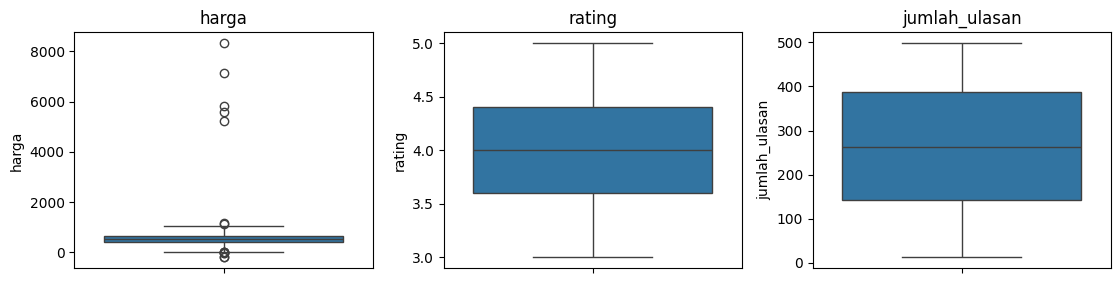

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 2. IQR

In [28]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


**Dampak Outlier**

Keberadaan outlier dalam data dapat memberikan beberapa dampak signifikan terhadap analisis, di antaranya:



1.   Mempengaruhi Rata-rata (Mean)

Outlier dapat menarik atau mendorong nilai rata-rata sehingga tidak lagi mencerminkan nilai tengah data secara akurat.

2. Mengganggu Hasil Statistik

Statistik seperti standar deviasi, varians, dan regresi bisa menjadi bias atau tidak valid karena dipengaruhi oleh nilai ekstrem.

3. Menyesatkan Visualisasi Data

Grafik seperti histogram atau boxplot bisa menjadi tidak proporsional dan sulit diinterpretasikan jika terdapat outlier.

4. Mempengaruhi Kinerja Model Machine Learning

Model regresi dan algoritma berbasis jarak (misalnya K-Means, KNN) bisa terdistorsi karena terlalu dipengaruhi oleh outlier.

5. Meningkatkan Risiko Kesalahan dalam Pengambilan Keputusan

Jika tidak ditangani dengan baik, outlier dapat menyebabkan kesimpulan yang salah dalam analisis bisnis atau penelitian.

Untuk menangani outlier, bisa dilakukan pendekatan seperti transformasi data, winsorizing (memotong nilai ekstrem), atau menggunakan metode deteksi seperti Z-score dan IQR.

### **Winsorizing (Mengganti outlier dengan batas atas/bawah)**

In [29]:
def winsorize_data(df, column, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

In [31]:
# Menerapkan Winsorizing
for col in num_cols:
    winsorize_data(data, col)

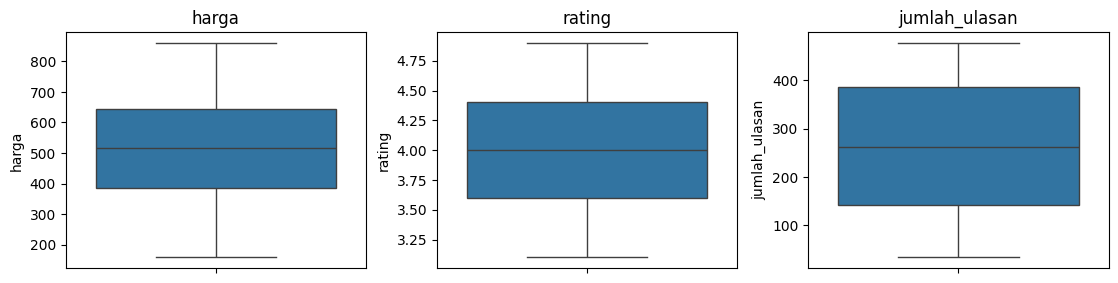

In [32]:
#cek boxplot

num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## **4. Encoding Data**

Encoding adalah teknik untuk mengonversi data kategorik ke dalam bentuk numerik agar dapat diproses oleh algoritma Machine Learning. Karena sebagian besar model hanya bekerja dengan angka, maka data kategorik perlu ditransformasikan sebelum digunakan dalam pemodelan.

🔹 **Metode Encoding dalam Machine Learning**  
Berbagai teknik encoding dapat diterapkan tergantung pada karakteristik data kategorik, di antaranya:

1. **One-Hot Encoding (OHE)** – Mengubah setiap kategori menjadi kolom biner (0/1). Metode ini efektif jika jumlah kategori terbatas, karena semakin banyak kategori, semakin tinggi dimensi data yang dihasilkan.  
2. **Ordinal Encoding** – Mengonversi kategori menjadi angka berurutan (0,1,2, ...), cocok untuk data dengan tingkatan jelas, seperti jenjang pendidikan (SD < SMP < SMA).  
3. **Target Encoding** – Mengganti kategori dengan rata-rata nilai target (misalnya rata-rata rating IMDB per negara), efektif ketika terdapat korelasi kuat antara kategori dan variabel target.

Dari data yang ditampilkan, kolom yang perlu di-encoding adalah kolom dengan tipe data **object**, yaitu:

1. **kategori** – Perlu di-encode karena merupakan data kategorikal.
2#melihat isi dalam kolom. **negara_asal** – Perlu di-encode karena berisi kategori negara.

Kolom lainnya seperti **produk_id, harga, rating, dan jumlah_ulasan** sudah dalam bentuk numerik sehingga tidak memerlukan encoding.

In [35]:
#melihat isi dalam kolom
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [36]:
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

## 4. b) Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk setiap kolom. Jelaskan alasan pemilihan metode tersebut.

1. One-Hot Encoding (OHE)

🔹 Cara kerja: Mengubah setiap kategori menjadi kolom biner (0 atau 1).

🔹 Kelebihan: Tidak mengasumsikan urutan dalam kategori dan cocok untuk kategori yang tidak terlalu banyak.

🔹 Kekurangan: Jika kategori terlalu banyak, bisa menyebabkan dimensionalitas tinggi.



2. Ordinal Encoding


🔹 Cara kerja: Mengubah kategori menjadi angka berurutan (misalnya: A=0, B=1, C=2).

🔹 Kelebihan: Efektif untuk kategori yang memiliki hubungan atau urutan.

🔹 Kekurangan: Tidak cocok untuk kategori tanpa urutan karena bisa menimbulkan bias dalam model.



3. Target Encoding

🔹 Cara kerja: Mengganti kategori dengan nilai rata-rata dari target (misalnya rata-rata harga atau rating dari setiap kategori).

🔹 Kelebihan: Mengurangi dimensionalitas dibandingkan dengan OHE dan bisa menangkap hubungan statistik.

🔹 Kekurangan: Bisa menyebabkan overfitting, terutama jika dataset kecil.




Pemilihan Metode Encoding untuk Setiap Kolom


1. Kolom kategori

Gunakan One-Hot Encoding, karena kategori tidak memiliki urutan yang jelas dan jumlahnya kemungkinan tidak terlalu banyak.



In [39]:
import pandas as pd

# Contoh data
data = pd.DataFrame({
    'kategori': ['Smartwatch', 'Laptop', 'Smartphone', 'Camera', 'Tablet', 'Headphone', 'PC']
})

# Buat dictionary untuk pengkategorian macam-macam perangkat elektronik berdasarkan mobilitas (portabilitas)
mobilitas_portabilitas = {
    'Smartwatch': 'Portabel',
    'Headphone': 'Portabel',
    'Tablet': 'Portabel',
    'Laptop': 'Kurang_Portabel',
    'Camera': 'Portabel',
    'Smartphone': 'Portabel'
}

# Ubah kategori menjadi mobilitas
data['kategori_mobilitas'] = data['kategori'].map(mobilitas_portabilitas).fillna('Others')

# One-Hot Encoding pada mobilitas
data = pd.get_dummies(data, columns=['kategori_mobilitas'], prefix='mobilitas')

# Tampilkan hasil
print(data)


     kategori  mobilitas_Kurang_Portabel  mobilitas_Others  mobilitas_Portabel
0  Smartwatch                      False             False                True
1      Laptop                       True             False               False
2  Smartphone                      False             False                True
3      Camera                      False             False                True
4      Tablet                      False             False                True
5   Headphone                      False             False                True
6          PC                      False              True               False


2. Kolom negara_asal  

Gunakan Target Encoding atau One-Hot Encoding, tergantung pada jumlah kategori. Jika jumlah negara sedikit, gunakan One-Hot Encoding. Jika jumlah negara banyak dan ada korelasi dengan target (misalnya harga atau rating), Target Encoding lebih baik untuk mengurangi jumlah kolom tambahan.

In [40]:
import pandas as pd

# Contoh data
data = pd.DataFrame({
    'negara_asal': ['USA', 'Germany', 'India', 'China', 'Canada', 'France', 'South Korea', 'Brazil']
})

# Buat dictionary untuk mapping negara ke region
country_to_region = {
    'USA': 'North America',
    'Canada': 'North America',
    'UK': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'China': 'Asia',
    'Japan': 'Asia',
    'India': 'Asia',
    'South Korea': 'Asia',
}

# Ubah negara menjadi region
data['country_region'] = data['negara_asal'].map(country_to_region).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['country_region'], prefix='region')

# Tampilkan hasil
print(data)


   negara_asal  region_Asia  region_Europe  region_North America  \
0          USA        False          False                  True   
1      Germany        False           True                 False   
2        India         True          False                 False   
3        China         True          False                 False   
4       Canada        False          False                  True   
5       France        False           True                 False   
6  South Korea         True          False                 False   
7       Brazil        False          False                 False   

   region_Others  
0          False  
1          False  
2          False  
3          False  
4          False  
5          False  
6          False  
7           True  


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   negara_asal           8 non-null      object
 1   region_Asia           8 non-null      bool  
 2   region_Europe         8 non-null      bool  
 3   region_North America  8 non-null      bool  
 4   region_Others         8 non-null      bool  
dtypes: bool(4), object(1)
memory usage: 228.0+ bytes
